# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data


### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [98]:
#importing libraries
import json
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
#Reading json file open() and load()
file = open('yearinfo.json')
load_file = json.load(file)
load_file


{'2010': [{'band_singer': ['Kesha'],
   'ranking': 1,
   'song': ['/wiki/Tik_Tok_(song)'],
   'songurl': ['Tik Tok (song)'],
   'titletext': '"Tik Tok"',
   'url': ['/wiki/Kesha']},
  {'band_singer': ['Lady Antebellum'],
   'ranking': 2,
   'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'],
   'songurl': ['Need You Now (Lady Antebellum song)'],
   'titletext': '"Need You Now"',
   'url': ['/wiki/Lady_Antebellum']},
  {'band_singer': ['Train (band)'],
   'ranking': 3,
   'song': ['/wiki/Hey,_Soul_Sister'],
   'songurl': ['Hey, Soul Sister'],
   'titletext': '"Hey, Soul Sister"',
   'url': ['/wiki/Train_(band)']},
  {'band_singer': ['Katy Perry', 'Snoop Dogg'],
   'ranking': 4,
   'song': ['/wiki/California_Gurls'],
   'songurl': ['California Gurls'],
   'titletext': '"California Gurls"',
   'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']},
  {'band_singer': ['Usher (musician)', 'Will.i.am'],
   'ranking': 5,
   'song': ['/wiki/OMG_(Usher_song)'],
   'songurl': ['OMG (Usher song)'],


### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [100]:
#creating column for dataframe
cols= list(load_file['2010'][0].keys())+(['year'])
cols

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

In [101]:
#appending all the datas in the song_list list
song_list = []
for key, value in load_file.items():
    for i in value:
        data = list(i.values())+[key]
        song_list.append(data)
print(song_list)

[[['Kesha'], ['/wiki/Tik_Tok_(song)'], ['Tik Tok (song)'], 1, '"Tik Tok"', ['/wiki/Kesha'], '2010'], [['Lady Antebellum'], ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], ['Need You Now (Lady Antebellum song)'], 2, '"Need You Now"', ['/wiki/Lady_Antebellum'], '2010'], [['Train (band)'], ['/wiki/Hey,_Soul_Sister'], ['Hey, Soul Sister'], 3, '"Hey, Soul Sister"', ['/wiki/Train_(band)'], '2010'], [['Katy Perry', 'Snoop Dogg'], ['/wiki/California_Gurls'], ['California Gurls'], 4, '"California Gurls"', ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg'], '2010'], [['Usher (musician)', 'Will.i.am'], ['/wiki/OMG_(Usher_song)'], ['OMG (Usher song)'], 5, '"OMG"', ['/wiki/Usher_(musician)', '/wiki/Will.i.am'], '2010'], [['B.o.B', 'Hayley Williams'], ['/wiki/Airplanes_(song)'], ['Airplanes (song)'], 6, '"Airplanes"', ['/wiki/B.o.B', '/wiki/Hayley_Williams'], '2010'], [['Eminem', 'Rihanna'], ['/wiki/Love_the_Way_You_Lie'], ['Love the Way You Lie'], 7, '"Love the Way You Lie"', ['/wiki/Eminem', '/wiki/Rihanna']

In [102]:
#creating dataframe and print top 5 rows
df = pd.DataFrame(song_list,columns=cols)
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [103]:
#checking datatypes 
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [104]:
#data type of year is object so we have to change it into int
df = df.astype({'year': 'int64'})
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

In [105]:
#function to entry data in a proper way by removing the [] from every entries
def fetch_list_value(list_name):
    value = list_name[0]
    return value

df['band_singer'] = df.band_singer.map(fetch_list_value)
df['song'] = df.song.map(fetch_list_value)
df['songurl'] = df.songurl.map(fetch_list_value)
df['url'] = df.url.map(fetch_list_value)


In [106]:
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

In [107]:
#checking null values
df.isna().sum()

band_singer    0
song           0
songurl        0
ranking        0
titletext      0
url            0
year           0
dtype: int64

In [108]:
 #dimension o fthe dataframe
 df.shape

(1200, 7)

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [109]:
#popular singer in descending order
new_df = df.value_counts(subset=['band_singer'], ascending=False)
new_df


band_singer      
Drake (musician)     26
Maroon 5             21
Rihanna              21
Ariana Grande        20
Taylor Swift         19
                     ..
Duncan Laurence       1
Dr. Dre               1
Donald Glover         1
Mike Will Made It     1
Kris Allen            1
Length: 436, dtype: int64

In [110]:
# To return singers who have appeared more than 15 times.

new_df = new_df.loc[lambda x : x > 15]
new_df

band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
dtype: int64

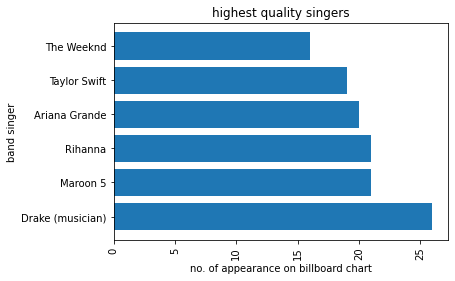

In [111]:
# Plot the most prolific singers which appeared more than 15 times
y = df.band_singer.value_counts().loc[lambda x : x > 15]
x = y.index
plt.barh(x,y)
plt.title("highest quality singers")
plt.xticks(rotation=90)
plt.xlabel('no. of appearance on billboard chart')
plt.ylabel('band singer')
plt.show()

**Question: Who is the most profilic singer?**


###Band singer "Drake(musician)" is the most profilic singer with the appearance of 26 times on billdoard chart.

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [112]:
#write your code here
df['score'] = [101-i for i in df['ranking']]
df.tail()


band_singer                                         song  \
1195   Lainey Wilson               /wiki/Things_a_Man_Oughta_Know   
1196        BRS Kash                  /wiki/Throat_Baby_(Go_Baby)   
1197        Rod Wave                       /wiki/Tombstone_(song)   
1198      Chase Rice  /wiki/Drinkin%27_Beer._Talkin%27_God._Amen.   
1199  Rauw Alejandro                             /wiki/Todo_de_Ti   

                                songurl  ranking  \
1195           Things a Man Oughta Know       96   
1196              Throat Baby (Go Baby)       97   
1197                   Tombstone (song)       98   
1198  Drinkin' Beer. Talkin' God. Amen.       99   
1199                         Todo de Ti      100   

                                titletext                   url  year  score  
1195           "Things a Man Oughta Know"   /wiki/Lainey_Wilson  2021      5  
1196              "Throat Baby (Go Baby)"        /wiki/BRS_Kash  2021      4  
1197                          "Tombstone"        /wiki/Rod_Wave  2021      3  
1198  "Drinkin' Beer. Talkin' God. Amen."      /wiki/Chase_Rice  2021      2  
1199                         "Todo de Ti"  /wiki/Rauw_Alejandro  2021      1

In [113]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
score           int64
dtype: object

In [114]:
# total score along with the singer
total_score = {}

for key_singer, value_songs in df.groupby('band_singer'):
    total_score[key_singer] = value_songs.score.sum()

total_score

{'2 Chainz': 49,
 '21 Savage': 112,
 '24kGoldn': 151,
 '3OH!3': 28,
 '5 Seconds of Summer': 156,
 '6ix9ine': 115,
 'A Boogie wit da Hoodie': 99,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 657,
 'Alessia Cara': 140,
 'Alex Clare': 71,
 'Alicia Keys': 77,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 1104,
 'Arizona Zervas': 85,
 'Ava Max': 106,
 'Avicii': 202,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 244,
 'BRS Kash': 4,
 'BTS': 213,
 'Baauer': 97,
 'Bad Bunny': 148,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 86,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 108,
 'Beyoncé': 172,
 'Big Sean': 178,
 'Billie Eilish': 380,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 78,
 'Blake Shelton': 200,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,


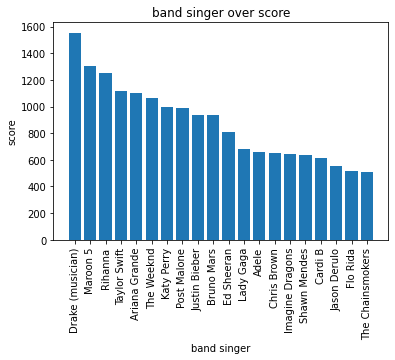

In [115]:
# graph for band_singer over score

y = pd.Series(data=total_score, index=total_score.keys()).sort_values(ascending=False)[:20]
x = y.index
plt.bar(x,y)
plt.title('band singer over score')
plt.xticks(rotation=90)
plt.xlabel('band singer')
plt.ylabel('score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

Top 3 didn't shift their position while others changed their position when we change the metric.This is because in the first case we are only considering the no. of times the singers are appearing at the top 100 whereas in the second case we are taking into consideration the ranking and then we are giving a higher score to those who appeared at the higher ranking.

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

who is worst singer of year 2010 based
on score?





In [116]:
#group by year
df2 = df.groupby('year')
df2

In [117]:
#print all the years with no of songs
df2.size()

year
2010    100
2011    100
2012    100
2013    100
2014    100
2015    100
2016    100
2017    100
2018    100
2019    100
2020    100
2021    100
dtype: int64

In [118]:
#get 2010 from df_2010
df_2010=newdf.get_group(2010)
df_2010.tail()

band_singer                                    song  \
95     Daughtry (band)    /wiki/Life_After_You_(Daughtry_song)   
96       Uncle Kracker        /wiki/Smile_(Uncle_Kracker_song)   
97  Cali Swag District            /wiki/Teach_Me_How_to_Dougie   
98         Alicia Keys  /wiki/Try_Sleeping_with_a_Broken_Heart   
99      Jerrod Niemann                      /wiki/Lover,_Lover   

                             songurl  ranking  \
95    Life After You (Daughtry song)       96   
96        Smile (Uncle Kracker song)       97   
97            Teach Me How to Dougie       98   
98  Try Sleeping with a Broken Heart       99   
99                      Lover, Lover      100   

                             titletext                       url  year  score  
95                    "Life After You"     /wiki/Daughtry_(band)  2010      5  
96                             "Smile"       /wiki/Uncle_Kracker  2010      4  
97            "Teach Me How to Dougie"  /wiki/Cali_Swag_District  2010      3  
98  "Try Sleeping with a Broken Heart"         /wiki/Alicia_Keys  2010      2  
99                      "Lover, Lover"      /wiki/Jerrod_Niemann  2010      1

In [119]:
#determine the wworst book by min score in year 2010
worst_movie=df_2010[df_2010['score']==df_2010.score.min()]
worst_movie['band_singer']

99    Jerrod Niemann
Name: band_singer, dtype: object

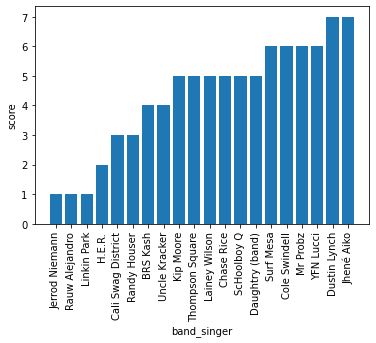

In [120]:
y = pd.Series(data=score_max, index=score_max.keys()).sort_values(ascending=True)[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('band_singer')
plt.ylabel("score")
plt.show()

Worst book of the year 2010 is Jerrod Niemann .

## SUBMISSION DATE: 2nd April 2022 